# Linear Layer
> Mạng Neural Đơn Giản với Các lớp Input và Output

## Previous Chapter Code

In [19]:
# Download Data
import numpy as np
import torchvision
from torchvision import datasets

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True)

# constant for classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

x = train_dataset.data
y = train_dataset.targets

# Split data into train & valid set
from sklearn.model_selection import train_test_split

valid_pct = .2
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = valid_pct)

# Normalization 
def min_max_scale(data, a=0, b=1):
    # Calculate the minimum and maximum values of the data
    data_min = data.min()
    data_max = data.max()
    
    # Perform Min-Max Scaling
    data_norm = (data - data_min) / (data_max - data_min)
    
    # Rescale the data to the [a, b] range
    data_norm = a + data_norm * (b - a)
    
    return data_norm

x_train_norm = min_max_scale(x_train)
x_valid_norm = min_max_scale(x_valid)

# Load data
from torch.utils.data import TensorDataset, DataLoader

def load_data(x_tensor, y_tensor, batch_size, test):
    data = TensorDataset(x_tensor, y_tensor)
    
    data_loader = DataLoader(data, batch_size=batch_size, shuffle=not test, drop_last=not test)
    
    print(f"Total Mini-Batches: {len(data_loader)}")
    for i, (x, y) in enumerate(data_loader):
        if i == 0:
            print(f"Shape of Each Mini-Batch: {x.shape}")
            print("")
            break
    return data_loader

batch_size = 128
train_loader = load_data(x_train, y_train, batch_size=batch_size, test = False)
valid_loader = load_data(x_valid, y_valid, batch_size=batch_size, test=True)

Total Mini-Batches: 375
Shape of Each Mini-Batch: torch.Size([128, 28, 28])

Total Mini-Batches: 94
Shape of Each Mini-Batch: torch.Size([128, 28, 28])



Trong đoạn mã trên, tôi chỉ loại bỏ các câu lệnh print không cần thiết và giữ nguyên phần phần còn lại của đoạn code như trong chương trước đó.

## Forward Propagation

In [20]:
import torch

# Get the first min batch of data from the train_loader
sample_x, sample_y = next(iter(train_loader))

# Reshape X to match the neural network model input size (flatten)
sample_x = sample_x.view(-1, 784)

# Convert X to the appropriate data type (float32)
sample_x = sample_x.to(torch.float32)

# Define the number of output classes
n_out = 10

# Initialize weight and bias tensors with requires_grad=True
weight = torch.randn(784, n_out, requires_grad = True)
bias = torch.zeros(n_out, requires_grad = True)

# Perform the forward pass through the neural network
sample_out = sample_x @ weight + bias

# Check the shape of the output
sample_out.shape

torch.Size([128, 10])

**Linear Layer: Một trong những Mô hình Cơ bản của Deep Learning**

Linear Layer (Lớp Tuyến tính) là một trong những mô hình cơ bản nhất trong lĩnh vực Deep Learning. Mô hình này chỉ cần một đầu vào đã được làm phẳng (flatten), một trọng số (weight) và một sai số (bias) để hoạt động. Các thành phần này hoạt động cùng nhau để tạo ra dự đoán cho biến mục tiêu của dự án.

**Công thức Linear Layer:**

Dự đoán (Prediction) được tính bằng công thức sau:

$$ \text{Prediction} = (\text{Input} \cdot \text{Weight}) + \text{Bias} $$

Trong đó:

- Prediction: Kết quả đầu ra mong muốn. 

- Input: là vector đầu vào đã được làm phẳng.

- Weight: là trọng số cần tìm để tối ưu hóa mô hình.

- Bias: là giá trị điều chỉnh cho dự đoán.

Trong thực tế, trọng số (weight) thường được khởi tạo ngẫu nhiên theo phân phối đồng nhất (uniform distribution), và Bias thường bắt đầu từ giá trị 0.

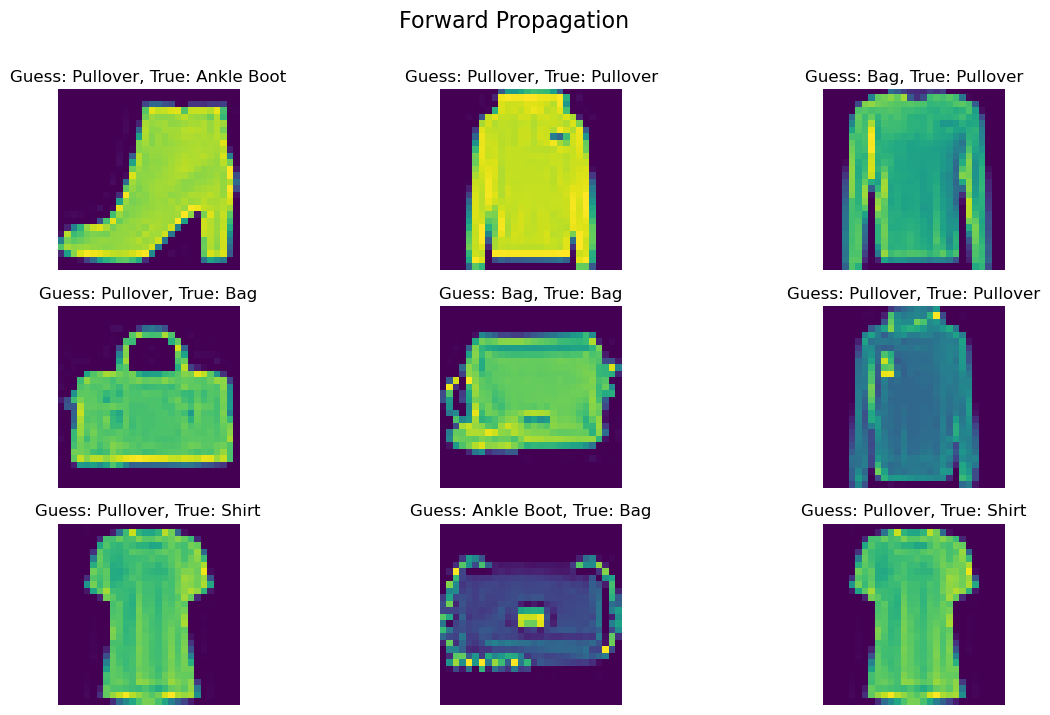

In [21]:
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 4 columns
fig, axs = plt.subplots(3, 3, figsize=(14, 8))

# Iterate through each subplot
for ax in axs.flatten():
    # Select a random index from the batch
    random_index = np.random.choice(len(sample_out))

    # Display the image at the selected index
    ax.imshow(sample_x[random_index].view(28, 28))
    
    # Get the true label and predicted label for the selected index
    true_label = sample_y[random_index]
    guess_label = sample_out.argmax(1)[random_index]
    
    # Set the title of the subplot with the true and predicted labels
    ax.set_title(f"Guess: {classes[guess_label]}, True: {classes[true_label]}")
    
    # Turn off axis for better visualization
    ax.axis("off")

# Add a title to the entire figure
plt.suptitle("Forward Propagation", fontsize=16)

# Show the plot
plt.show()

**Forward Propagation**, giống như tên của nó, là quá trình diễn ra từ đầu vào đến đầu ra mục tiêu mà không quan tâm đến kết quả cuối cùng. 

Để hình dung, hãy nghĩ về việc bạn đang làm một bài thi. Trong quá trình bạn làm xong bài đó tới khi hết giờ, bạn không cần biết điểm cuối cùng của mình sẽ là bao nhiêu. Forward Propagation chính là giai đoạn này trong Deep Learning, nó là bước đầu tiên và quan trọng nhất trong việc tính toán dự đoán của mô hình trước khi xem xét các bước sau như tính toán loss và cập nhật trọng số trong quá trình huấn luyện.

## Loss Function

Trong Deep Learning, có 3 hàm Loss Function rất phổ biến và thường được sử dụng trong hầu hết các dự án:

- Binary Cross-Entropy (BCE) Loss 

- Mean Squared Error (MSE) Loss

- Cross-Entropy Loss

Sự lựa chọn giữa các hàm Loss Function này phụ thuộc vào mục tiêu cụ thể của mỗi dự án.

In [22]:
import torch.nn as nn
loss_fn_bce = nn.BCELoss()

**Binary Cross-Entropy (BCE) Loss:** Thường được sử dụng trong các nhiệm vụ phân loại nhị phân. BCE Loss giúp đo lường mức độ sai lệch giữa dự đoán và thực tế khi chỉ có hai lớp đối tượng. 

Để hình dung, hãy tưởng tượng hôm nay là những ngày cuối năm học, bạn đã thu thập tất cả các điểm thi của mình (là đầu vào), và bạn muốn sử dụng những điểm số này để dự đoán xem liệu bạn có đủ điểm để được xếp vào danh sách "Học sinh Giỏi" hay "không". Trong tình huống này, bạn sẽ nên sử dụng Binary Cross-Entropy Loss để đo lường sự chênh lệch giữa dự đoán của bạn và thực tế. BCE Loss giúp bạn đánh giá mức độ "đúng" của dự đoán dựa trên hai khả năng: "có" hoặc "không có" danh hiệu Học sinh Giỏi.

In [23]:
import torch.nn as nn
loss_fn_ce = nn.CrossEntropyLoss()

**Cross-Entropy Loss:** Thường được sử dụng trong các tác vụ phân loại đa lớp. CE Loss giúp đo độ khác biệt giữa phân phối xác suất của dự đoán và phân phối xác suất thực tế của các lớp.

Để hình dung, (giống như ví dụ trước) hôm nay là những ngày cuối năm học và đã thu thập tất cả điểm số từ các kỳ thi của mình (đây là dữ liệu đầu vào). Thay vì bạn chỉ quan tâm đến việc bạn có đủ điểm để được xếp hạng Giỏi hay không, bạn muốn biết chính xác bạn thuộc loại Giỏi, Khá, Trung bình. Trong tình huống này, bạn sẽ nên sử dụng Cross-Entropy Loss để đánh giá mức độ khác biệt giữa dự đoán của bạn và thực tế. CE Loss giúp bạn đo đạc mức độ "đúng" của dự đoán dựa trên khả năng phân loại chính xác vào từng loại danh hiệu học tập khác nhau, chẳng hạn như Giỏi, Khá, và Trung bình.

In [24]:
import torch.nn as nn
loss_fn_mse = nn.MSELoss()

**Mean Squared Error (MSE) Loss:** Thường được ưa chuộng trong các tác vụ dự đoán và hồi quy. MSE Loss đo độ lớn của sai số bình phương giữa dự đoán và giá trị thực tế. Ví dụ như là dự đoán giá nhà, dự đoán giá sản phẩm.

Để hình dung, (giống như ví dụ trước) hôm nay là những ngày cuối năm học và đã thu thập tất cả điểm số từ các kỳ thi của mình (đây là dữ liệu đầu vào). Thay vì chỉ quan tâm đến việc bạn có đủ điểm để được xếp hạng Giỏi, Khá, hay Trung bình, bạn muốn biết chính xác điểm tổng kết năm học của bạn sẽ là bao nhiêu. Trong tình huống này, bạn sẽ nên sử dụng Mean Squared Error (MSE) Loss để đánh giá mức độ khác biệt giữa dự đoán của bạn và thực tế. MSE Loss giúp bạn đo đạc mức độ sai lệch bình phương giữa dự đoán và điểm tổng kết thực tế, cho phép bạn biết được mức độ chính xác của dự đoán về điểm số.

In [25]:
loss_fn = nn.CrossEntropyLoss()

# Converting the data type of sample_y to Long.
sample_y = sample_y.to(torch.long)

sample_loss = loss_fn(sample_out, sample_y)
print(f"Loss: {sample_loss}")
sample_loss

Loss: 4263.34912109375


tensor(4263.3491, grad_fn=<NllLossBackward0>)

Trong dự án Fashion MNIST này, với mục tiêu là phân loại thành 10 nhãn, việc sử dụng **Cross-Entropy Loss** là lựa chọn phù hợp nhất.

Hàm CrossEntropyLoss trong PyTorch đòi hỏi đầu vào y_true (targets) phải có kiểu dữ liệu là Long (integer) và chứa các nhãn thực tế, cùng với dự đoán (output prediction) của mô hình.

## Optimization Algorithms

Có 3 thuật toántối ưu hóa phổ biến trong giảng dạy, thử nghiệm và cải thiện mô hình:

- **SGD**: Stochastic Gradient Descent

- **Adam**: Adaptive Moment Estimation

- **RMSProp**: Root Mean Square Propagation


In [26]:
parameters = [weight, bias]
learning_rate = .01

# SGD
optimizer_sgd = torch.optim.SGD(parameters, lr = learning_rate) 

**SGD (Stochastic Gradient Descent)** có thể coi là một trong những thuật toán tối ưu hóa (optimizer) cơ bản nhất trong Deep Learning. Nó tương tự như Linear Layer, được xem như một trong những nền tảng cơ bản nhất để phát triển mô hình Neural Network trong Deep Learning. SGD cung cấp một nền tảng quan trọng để từ đó các thuật toán tối ưu hóa nâng cao như Adam và RMSProp được phát triển và hoạt động

In [27]:
parameters = [weight, bias]
learning_rate = .01

# RMSProp 
optimizer_rms = torch.optim.RMSprop(parameters, lr = learning_rate) 

# Adam
optimizer_adam = torch.optim.Adam(parameters, lr = learning_rate)

**Adam** và **RMSProp** có thể được xem là những thuật toán tối ưu hóa (optimizer) tiến bộ hơn của SGD trong Deep Learning. Chúng thường giúp cho mô hình học nhanh và hiệu quả hơn.

Để dễ hình dung, hãy nghĩ đến một tình huống trong đó bạn cần ôn thi với một đề cương dày đặc. Thay vì phải đọc toàn bộ đề cương, điều này có thể mất nhiều thời gian, bạn quyết định sử dụng một phương pháp thông minh hơn. Bạn tập trung vào việc học các từ khóa chính của từng câu hỏi trong đề cương. Bằng cách này, bạn vẫn có thể đạt điểm cao trong kì thi nhưng tiết kiệm được rất nhiều thời gian.

Tương tự, Adam và RMSProp giúp mô hình Deep Learning tập trung vào những điểm quan trọng trong quá trình học, điều này giúp cải thiện hiệu suất huấn luyện và tiết kiệm thời gian so với việc sử dụng SGD truyền thống.

In [28]:
parameters = [weight, bias]
learning_rate = .01

# Use Adam
optimizer = torch.optim.Adam(parameters, lr = learning_rate)

Trước tiên, tôi sẽ tiến hành thử nghiệm mô hình bằng cách sử dụng thuật toán **Adam**. Sau khi đã tiến đến giai đoạn kiểm tra và có cái nhìn tổng quan về hiệu suất của mô hình, tôi sẽ xem xét việc tối ưu hóa mô hình bằng cách thử nghiệm với RMSProp optimizer.

## Backward Propagation

In [29]:
for i in range(2):
    print(f"Loss Before Backward: {sample_loss}")
    
    # Backward Propagation 
    sample_loss.backward()
    
    # Update parameters
    optimizer.step()
    optimizer.zero_grad()

    # Forward Propagation
    sample_out = sample_x @ weight + bias
    sample_loss = loss_fn(sample_out, sample_y)

    print(f"Loss After Backward: {sample_loss}")
    print("")

Loss Before Backward: 4263.34912109375
Loss After Backward: 3630.927490234375

Loss Before Backward: 3630.927490234375
Loss After Backward: 3089.424072265625



**Backpropagation** là quá trình quan trọng trong huấn luyện mạng neural để giảm thiểu độ lỗi (loss), tức là để đưa ra các dự đoán (predictions) gần giống với các giá trị thực tế (labels). Nó cho phép mô hình của bạn hiệu quả hơn trong việc dự đoán kết quả dựa trên dữ liệu đầu vào.

Thuật toán chính được sử dụng để điều chỉnh các tham số của mạng neural trong quá trình này gọi là **Gradient Descent**. Cụ thể, bạn tính toán độ dốc (gradient) của mỗi tham số, sau đó điều chỉnh các tham số đó bằng cách trừ một lượng nhất định (được điều chỉnh bởi **learning rate**) nhân với độ dốc (gradient). Quá trình này được lặp lại nhiều lần để dần dần cải thiện khả năng dự đoán của mô hình.

Vì vậy, tổng hợp lại, **Backpropagation** là quá trình tối ưu hóa mô hình thông qua **Gradient Descent**, giúp mô hình học từ dữ liệu và dự đoán chính xác hơn kết quả mà bạn mong muốn bằng cách điều chỉnh các tham số dựa trên độ dốc (gradient) và **Learning Rate** của loss function.

In [30]:
# Epoch
n_epochs = 3

for epoch in range(n_epochs):
    # Backward Propagation 
    sample_loss.backward()
    
    # Update parameters
    optimizer.step()
    optimizer.zero_grad()

    # Forward Propagation
    sample_out = sample_x @ weight + bias
    sample_loss = loss_fn(sample_out, sample_y)

    print(f"Epoch {epoch}: {sample_loss}")

Epoch 0: 2662.49658203125
Epoch 1: 2378.263916015625
Epoch 2: 2171.322998046875


Hãy tưởng tượng rằng bạn đang tham gia vào một cuộc thi để cố gắng đạt được điểm số cao nhất mà bạn có thể. Hãy xem xét quy trình sau:

Bước 1 - **Forward**: Lần đầu tiên khi bạn bắt đầu làm bài thi, bạn chỉ cố gắng làm xong tất cả các phần của bài thi mà không quan tâm đến điểm số cuối cùng. Trong ngữ cảnh của deep learning, điều này tương đương với việc sử dụng dữ liệu đầu vào để tính toán và tạo ra một đầu ra dự đoán.

Bước 2 - **Loss**: Sau khi bạn đã hoàn thành bài thi, bạn nhận được điểm số của mình từ giáo viên. Lúc này, bạn có thể so sánh điểm số này với điểm số tối đa có thể đạt được trong bài thi đó. Sự khác biệt giữa điểm số của bạn và điểm số tối đa đó được gọi là  loss. Trong Deep Learning, Loss là một số đo lường sự sai khác giữa đầu ra dự đoán và đầu ra thực tế mà chúng ta muốn.

Bước 3 - **Backward**: Với thông tin về loss, bạn bắt đầu nghiên cứu và học từ những câu hỏi hoặc phần của bài thi mà bạn đã trả lời sai hoặc không chắc chắn. Bạn cố gắng hiểu rõ hơn về chúng và cách cải thiện kết quả của mình. Trong deep learning, quá trình này được gọi là backward hoặc backpropagation. Nó giúp điều chỉnh các tham số trong neural network để giảm thiểu loss.

**Epoch (chu kỳ)**:  Mỗi lần bạn thực hiện quá trình từ "Forward" đến "Backward" từ đầu đến cuối, đó là một chu kỳ hoàn chỉnh (1 epoch) trong cuộc thi của bạn, và được gọi là một "Epoch."

Vậy, trong bối cảnh của deep learning, một "Epoch" là một chu kỳ hoàn chỉnh của quá trình huấn luyện mô hình, bao gồm Forward, tính toán Loss, và Backward để cải thiện mô hình. Việc lặp lại nhiều Epochs giúp mô hình học được từ dữ liệu và cải thiện khả năng dự đoán của nó.

## Altogether

### Use Sample Data

In [45]:
# Get a first mini batch of data
sample_x, sample_y = next(iter(train_loader))

# Reshape and cast the input data
sample_x = sample_x.view(-1, 784)
sample_x = sample_x.to(torch.float32)

# Cast the target labels to the 'long' data type
sample_y = sample_y.to(torch.long)

print(sample_x.shape, sample_y.shape)

torch.Size([128, 784]) torch.Size([128])


In [46]:
import torch

def train_model(input, targets, loss_fn, optimizer_algorithm, lr, n_epochs):
    # Initialize weights and bias
    weight = torch.randn(784, 10, requires_grad=True)
    bias = torch.zeros(10, requires_grad=True)
    
    # Get the optimizer function based on the provided algorithm name
    opt_fn = getattr(torch.optim, optimizer_algorithm)
    optimizer = opt_fn([weight, bias], lr=lr)
    
    # Lists to store losses and training accuracy
    losses = []
    train_acc = []
    
    for epoch in range(n_epochs):
        # Forward pass
        out = input @ weight + bias

        # Calculate loss
        loss = loss_fn(out, targets)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        # Store the loss
        losses.append(loss.item())
    
        # Calculate training accuracy
        acc = 100 * (out.argmax(1) == targets).float().mean()
        train_acc.append(acc)
        
    return out, losses, train_acc

In [47]:
# Define the loss function (CrossEntropyLoss) and optimizer algorithm (Adam)
loss_fn = nn.CrossEntropyLoss()
optimizer_algorithm = "Adam"

# Set the learning rate and number of training epochs
learning_rate = 0.01
n_epochs = 30

# Call the 'train_model' function to train the model
out, losses, train_acc = train_model(sample_x, sample_y, loss_fn, optimizer_algorithm, learning_rate, n_epochs)

# Retrieve the final loss and training accuracy
final_loss = losses[-1]
final_accuracy = train_acc[-1]

# Print or use the final_loss and final_accuracy as needed
print(f"Final Loss: {final_loss:.4f}")
print(f"Final Training Accuracy: {final_accuracy:.2f}%")

Final Loss: 439.6517
Final Training Accuracy: 67.97%


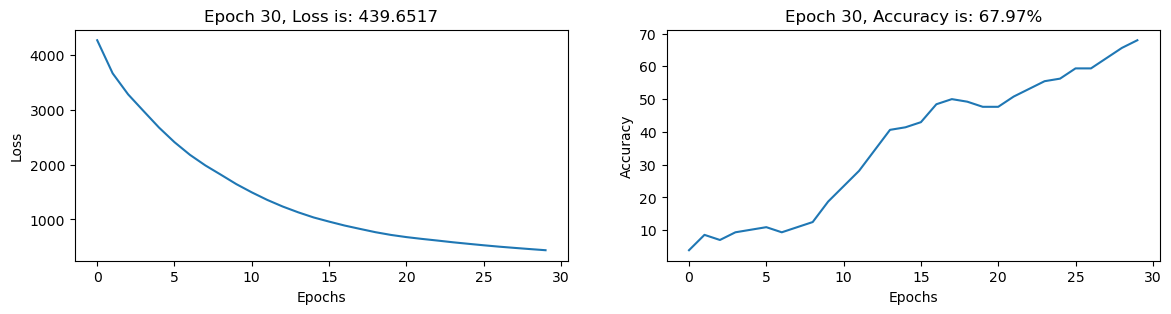

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (14, 3))

ax[0].plot(losses)
ax[0].set_title(f"Epoch {n_epochs}, Loss is: {final_loss:.4f}")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(train_acc)
ax[1].set_title(f"Epoch {n_epochs}, Accuracy is: {final_accuracy:.2f}%")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.show()

In [49]:
ids_error = (out.argmax(1) != sample_y).nonzero()
print(f"In {len(sample_y)} images, model guess wrong {len(ids_error)}")

In 128 images, model guess wrong 41


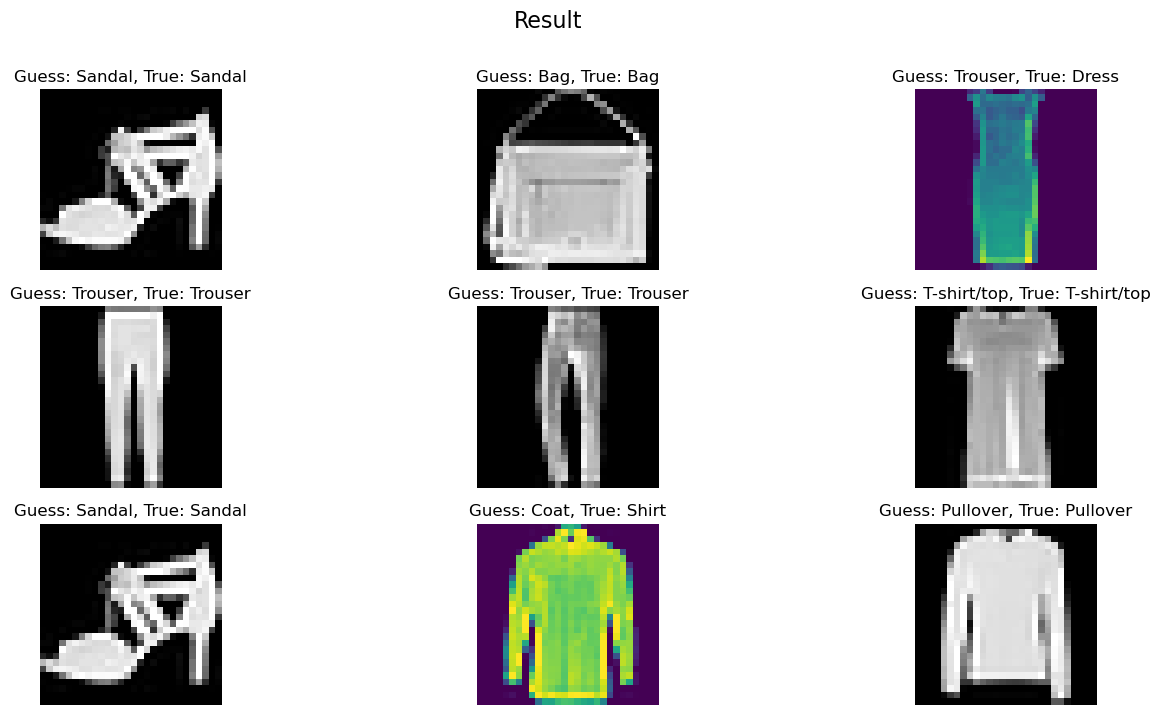

In [51]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(16, 8))

for ax in axs.flatten():
    # Select a random index from the output
    random_index = np.random.choice(len(out))
    
    # Display the image at the selected index with colormap gray for correct predictions
    true_label = sample_y[random_index]
    guess_label = out.argmax(1)[random_index]
    
    if true_label == guess_label:
        ax.imshow(sample_x[random_index].view(28, 28), cmap="gray")
    else:
        ax.imshow(sample_x[random_index].view(28, 28))
    
    
    ax.set_title(f"Guess: {classes[guess_label]}, True: {classes[true_label]}")
    ax.axis("off")

plt.suptitle("Result", fontsize=16)
plt.show()

### Use All Data

In [52]:
import torch

def train_model(train_loader, valid_loader, loss_fn, optimizer_algorithm, lr, n_epochs):
    # Initialize weights and bias
    weight = torch.randn(784, 10, requires_grad=True)
    bias = torch.zeros(10, requires_grad=True)
    
    # Get the optimizer function based on the provided algorithm name
    opt_fn = getattr(torch.optim, optimizer_algorithm)
    optimizer = opt_fn([weight, bias], lr=lr)
    
    # Lists to store losses and training accuracy
    losses = torch.zeros(n_epochs, len(train_loader))
    train_acc = torch.zeros(n_epochs, len(train_loader))
    valid_acc = torch.zeros(n_epochs, len(valid_loader))
    
    for epoch in range(n_epochs):
        for i, (x, y) in enumerate(train_loader):
            # Reshape and cast the input data
            x = x.view(-1, 784)
            x = x.to(torch.float32)

            # Cast the target labels to the 'long' data type
            y = y.to(torch.long)
            
            # Forward pass
            out = x @ weight + bias

            # Calculate loss
            loss = loss_fn(out, y)

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # Store the loss
            losses[epoch, i] = loss.item()

            # Calculate training accuracy
            acc = 100 * (out.argmax(1) == y).float().mean()
            train_acc[epoch, i] = acc
        
            # Evaluation in test data
            with torch.no_grad():
                for j, (x, y) in enumerate(valid_loader):
                    x = x.view(-1, 784)
                    x = x.to(torch.float32)

                    # Cast the target labels to the 'long' data type
                    y = y.to(torch.long)
                
                    out = x @ weight + bias

                    acc = 100 * (out.argmax(1) == y).float().mean()
                    valid_acc[epoch, j] = acc

    return [weight, bias], losses, train_acc, valid_acc

In [53]:
import time

# Get the start time
start_time = time.time()

# Define the loss function (CrossEntropyLoss) and optimizer algorithm (Adam)
loss_fn = nn.CrossEntropyLoss()
optimizer_algorithm = "Adam"

# Set the learning rate and number of training epochs
learning_rate = 0.01
n_epochs = 5

# Call the 'train_model' function to train the model with all data
parameters, losses, train_acc, valid_acc = train_model(train_loader, \
                                                       valid_loader, \
                                                       loss_fn, \
                                                       optimizer_algorithm, \
                                                       learning_rate, \
                                                       n_epochs)

# Get the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Convert to minutes and seconds
execution_time_minutes = int(execution_time // 60)
execution_time_seconds = round(execution_time % 60, 2) 

print(f"Model training time: {execution_time_minutes} min {execution_time_seconds}s")

Model training time: 7 min 15.44s


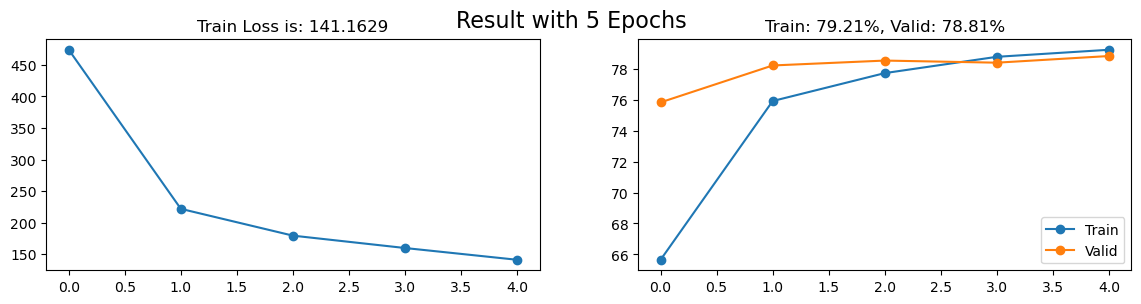

In [54]:
final_loss = losses.mean(1)[-1]
final_train_acc = train_acc.mean(1)[-1]
final_valid_acc = valid_acc.mean(1)[-1]

fig, axs = plt.subplots(1, 2, figsize = (14, 3))

axs[0].plot(range(losses.shape[0]), losses.mean(1), "-o")
axs[0].set_title(f"Train Loss is: {final_loss:.4f}")


axs[1].plot(range(train_acc.shape[0]), train_acc.mean(1), "-o")
axs[1].plot(range(valid_acc.shape[0]), valid_acc.mean(1), "-o")
axs[1].set_title(f"Train: {final_train_acc:.2f}%, Valid: {final_valid_acc:.2f}%")
axs[1].legend(["Train", "Valid"])

plt.suptitle(f"Result with {n_epochs} Epochs", fontsize = 16)
plt.show()


Kết quả cũng khá cao, hơn 75% trên tập dữ liệu validation bằng mô hình Linear Layer (mô hình neural đơn giản nhất) sau 5 epochs. Bây giờ, hãy cùng kiểm tra để xem liệu chúng ta có thể đạt được bao nhiêu phần trăm độ chính xác trên tập dữ liệu kiểm tra (test set).

In [55]:
x_test = test_dataset.data
y_test = test_dataset.targets

# Reshape and cast the input data
x_test = x_test.view(-1, 784)
x_test = x_test.to(torch.float32)

# Cast the target labels to the 'long' data type
y_test = y_test.to(torch.long)

In [58]:
weight = parameters[0]
bias = parameters[1]

out = x_test @ weight + bias

test_acc = 100 * (out.argmax(1) == y_test).float().mean()

ids_error = (out.argmax(1) != y_test).nonzero()
print(f"In {len(y_test)} images, model guess wrong {len(ids_error)}")
print(f"Accuracy is: {test_acc:.2f}%")

In 10000 images, model guess wrong 2288
Accuracy is: 77.12%


Với mô hình Linear Layer và 5 epochs, chúng ta đã đạt được độ chính xác là trên 75% trên tập dữ liệu kiểm tra (test set). Giờ hãy thử sử dụng một mạng neural (neural network) để xem liệu chúng ta có thể đạt được độ chính xác cao hơn không! Hãy cùng chờ xem kết quả sẽ thế nào!

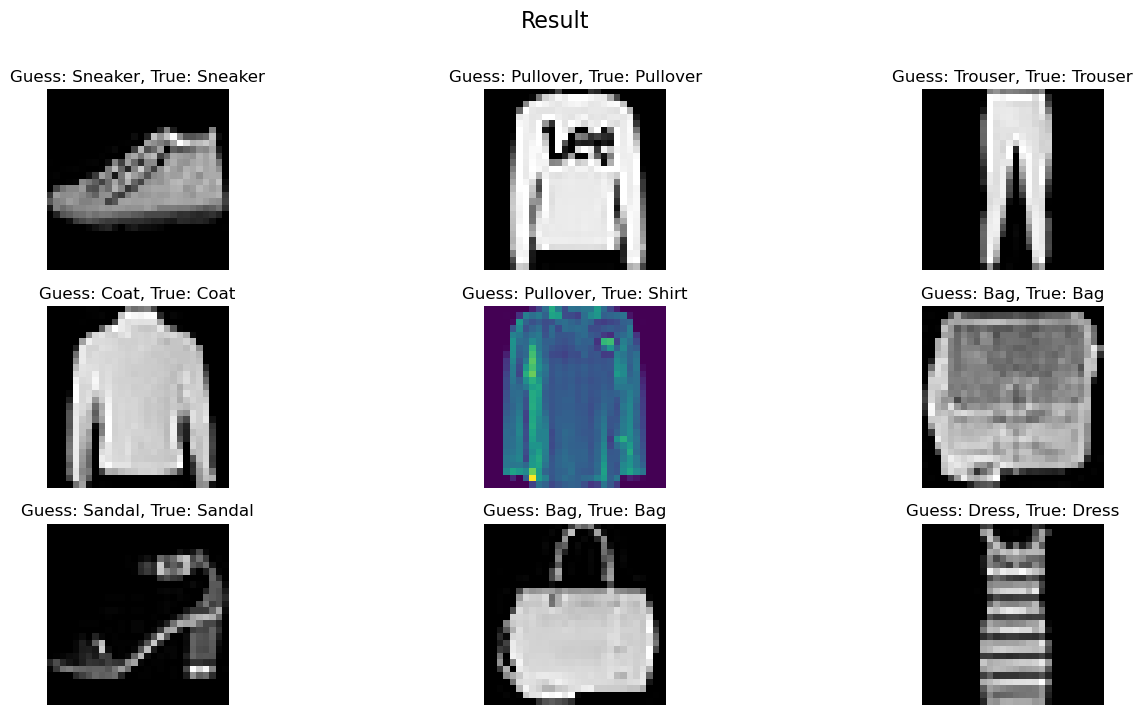

In [60]:
fig, axs = plt.subplots(3, 3, figsize=(16, 8))

for ax in axs.flatten():
    # Select a random index from the output
    random_index = np.random.choice(len(out))
    
    # Display the image at the selected index with colormap gray for correct predictions
    true_label = y_test[random_index]
    guess_label = out.argmax(1)[random_index]
    
    if true_label == guess_label:
        ax.imshow(x_test[random_index].view(28, 28), cmap="gray")
    else:
        ax.imshow(x_test[random_index].view(28, 28))
    
    
    ax.set_title(f"Guess: {classes[guess_label]}, True: {classes[true_label]}")
    ax.axis("off")

plt.suptitle("Result", fontsize=16)
plt.show()